In [1]:
# -*- coding: utf-8 -*-
"""
Created on Mon Jun 19 13:00:25 2023

@author: Addisu
"""

#%%
#%%
import pandas as pd
#Step 1: Read and explore data
file='C:/Users/Addisu/Desktop/kidi files/kidi/TMFD/dd.csv'
raw_data = pd.read_csv(file, parse_dates = ['point'],
                       index_col = 'point')
df = raw_data.copy()


df1=df.drop(["POINT_X","POINT_Y","LD"], axis=1)

import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingRegressor
#import matplotlib as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error
import numpy as np
from sklearn import metrics, svm
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.neighbors import KNeighborsClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.naive_bayes  import GaussianNB
from sklearn.svm import SVC
from sklearn.metrics import precision_recall_fscore_support
from sklearn.metrics import cohen_kappa_score


# Read data from  csv files
X = df1.drop(["FR"], axis=1)
Y = df1["FR"]
#%%

Y.isnull().sum().sum()
Y = Y.fillna(1)
Y.isnull().sum()
#%%


# standardize input features X and output labels Y
#scaler_standardized_X = StandardScaler()
#Input_data_features = scaler_standardized_X.fit_transform(Input_data_features)

#scaler_standardized_Y = StandardScaler()
#Input_data_labels = scaler_standardized_Y.fit_transform(Input_data_labels)
from collections import Counter
# split into train test sets



X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.10, random_state=1,stratify=Y)
print(Counter(Y_test))
print(Counter(Y_train))


# gradiant booster
from sklearn.ensemble import GradientBoostingClassifier
gb = GradientBoostingClassifier(random_state = 42)
from pprint import pprint
# Look at parameters used by our current forest
print('Parameters currently in use:\n')

#old baseline paramters
pprint(gb.get_params())

from sklearn.model_selection import RandomizedSearchCV
# Number of trees in random forest
n_estimators = [int(x) for x in np.linspace(start = 200, stop = 2000, num = 10)]
# Number of features to consider at every split
max_features = ['auto', 'sqrt']
# Maximum number of levels in tree
max_depth = [int(x) for x in np.linspace(10, 110, num = 11)]
max_depth.append(None)
# Minimum number of samples required to split a node
min_samples_split = [2, 5, 10]
# Minimum number of samples required at each leaf node
min_samples_leaf = [1, 2, 4]
# Method of selecting samples for training each tree
bootstrap = [True, False]
# Create the random grid
random_grid = {'n_estimators': n_estimators,
               'max_features': max_features,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf}
               #'bootstrap': bootstrap}
pprint(random_grid)

# Use the random grid to search for best hyperparameters
# First create the base model to tune
gb = GradientBoostingClassifier()
# Random search of parameters, using 3 fold cross validation, 
# search across 100 different combinations, and use all available cores
gb_random = RandomizedSearchCV(estimator = gb, 
                               param_distributions = random_grid, 
                               n_iter = 10, 
                               cv = 3, 
                               verbose=2, 
                               random_state=42, 
                               n_jobs = -1)
# Fit the random search model
gb_random.fit(X_train, Y_train)


gb_random.best_params_
pprint(gb_random.get_params())

def evaluate(model, test_features, test_labels):
    predictions = model.predict(test_features)
    errors = abs(predictions - test_labels)
    mape = 100 * np.mean(errors / test_labels)
    accuracy = 100 - mape
    print('Model Performance')
    print('Average Error: {:0.4f} degrees.'.format(np.mean(errors)))
    print('Accuracy = {:0.2f}%.'.format(accuracy))
    
    return accuracy
base_model = GradientBoostingClassifier(n_estimators = 10, random_state = 42)
base_model.fit(X_train, Y_train)
base_accuracy = evaluate(base_model,X_test, Y_test)
gbb = base_model.predict(X_test)

best_randomgb = gb_random.best_estimator_
random_accuracy = evaluate(best_randomgb, X_test, Y_test)
gbbe = best_randomgb.predict(X_test)
from sklearn import metrics

print('Improvement of {:0.2f}%.'.format( 100 * (random_accuracy - base_accuracy) / base_accuracy))

#%%
#print(f"Gradient Boosting Prediction: {Y_pred_gradientBoosting}")
print("Accuracy GradientBoostingClassifier: ", accuracy_score(Y_test, gbb))
#print("precision_recall_fscore GradientBoostingClassifier:",precision_recall_fscore_support(Y_test, GBP, average='weighted'))
precision_positive = metrics.precision_score(Y_test, gbb, pos_label=1,average='micro')
precision_negative = metrics.precision_score(Y_test, gbb, pos_label=0,average='micro') 
recall_sensitivity = metrics.recall_score(Y_test, gbb, pos_label=1,average='micro')
recall_specificity = metrics.recall_score(Y_test, gbb, pos_label=0,average='micro')
f1_positive = metrics.f1_score(Y_test, gbb, pos_label=1,average='micro' )
f1_negative = metrics.f1_score(Y_test, gbb, pos_label=1,average='micro')
print(metrics.classification_report(Y_test, gbb))
print("kappa GradientBoosting: ",cohen_kappa_score(Y_test,gbb))

#%%
#print(f"Gradient Boosting Prediction: {Y_pred_gradientBoosting}")
print("Accuracy GradientBoostingClassifier: ", accuracy_score(Y_test, gbbe))
#print("precision_recall_fscore GradientBoostingClassifier:",precision_recall_fscore_support(Y_test, GBP, average='weighted'))
precision_positive = metrics.precision_score(Y_test, gbbe, pos_label=1,average='micro')
precision_negative = metrics.precision_score(Y_test, gbbe, pos_label=0,average='micro') 
recall_sensitivity = metrics.recall_score(Y_test, gbbe, pos_label=1,average='micro')
recall_specificity = metrics.recall_score(Y_test, gbbe, pos_label=0,average='micro')
f1_positive = metrics.f1_score(Y_test, gbbe, pos_label=1,average='micro' )
f1_negative = metrics.f1_score(Y_test, gbbe, pos_label=1,average='micro')
print(metrics.classification_report(Y_test, gbbe))
print("kappa GradientBoosting: ",cohen_kappa_score(Y_test, gbbe))

#

C:\Users\Addisu\AppData\Local\Temp\ipykernel_17832\3712020944.py:13: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  raw_data = pd.read_csv(file, parse_dates = ['point'],


Counter({5: 27, 4: 25, 3: 13, 2: 10, 1: 5})
Counter({5: 243, 4: 220, 3: 120, 2: 85, 1: 47})
Parameters currently in use:

{'ccp_alpha': 0.0,
 'criterion': 'friedman_mse',
 'init': None,
 'learning_rate': 0.1,
 'loss': 'log_loss',
 'max_depth': 3,
 'max_features': None,
 'max_leaf_nodes': None,
 'min_impurity_decrease': 0.0,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'n_estimators': 100,
 'n_iter_no_change': None,
 'random_state': 42,
 'subsample': 1.0,
 'tol': 0.0001,
 'validation_fraction': 0.1,
 'verbose': 0,
 'warm_start': False}
{'max_depth': [10, 20, 30, 40, 50, 60, 70, 80, 90, 100, 110, None],
 'max_features': ['auto', 'sqrt'],
 'min_samples_leaf': [1, 2, 4],
 'min_samples_split': [2, 5, 10],
 'n_estimators': [200, 400, 600, 800, 1000, 1200, 1400, 1600, 1800, 2000]}
Fitting 3 folds for each of 10 candidates, totalling 30 fits


C:\anaconda3\envs\jupyterenv\lib\site-packages\sklearn\model_selection\_validation.py:425: FitFailedWarning: 
15 fits failed out of a total of 30.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
11 fits failed with the following error:
Traceback (most recent call last):
  File "C:\anaconda3\envs\jupyterenv\lib\site-packages\sklearn\model_selection\_validation.py", line 732, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\anaconda3\envs\jupyterenv\lib\site-packages\sklearn\base.py", line 1144, in wrapper
    estimator._validate_params()
  File "C:\anaconda3\envs\jupyterenv\lib\site-packages\sklearn\base.py", line 637, in _validate_params
    validate_parameter_constraints(
  File "C:\anaconda3\envs\jupyteren

{'cv': 3,
 'error_score': nan,
 'estimator': GradientBoostingClassifier(),
 'estimator__ccp_alpha': 0.0,
 'estimator__criterion': 'friedman_mse',
 'estimator__init': None,
 'estimator__learning_rate': 0.1,
 'estimator__loss': 'log_loss',
 'estimator__max_depth': 3,
 'estimator__max_features': None,
 'estimator__max_leaf_nodes': None,
 'estimator__min_impurity_decrease': 0.0,
 'estimator__min_samples_leaf': 1,
 'estimator__min_samples_split': 2,
 'estimator__min_weight_fraction_leaf': 0.0,
 'estimator__n_estimators': 100,
 'estimator__n_iter_no_change': None,
 'estimator__random_state': None,
 'estimator__subsample': 1.0,
 'estimator__tol': 0.0001,
 'estimator__validation_fraction': 0.1,
 'estimator__verbose': 0,
 'estimator__warm_start': False,
 'n_iter': 10,
 'n_jobs': -1,
 'param_distributions': {'max_depth': [10,
                                       20,
                                       30,
                                       40,
                                       50,


C:\anaconda3\envs\jupyterenv\lib\site-packages\sklearn\metrics\_classification.py:1521: UserWarning: Note that pos_label (set to 0) is ignored when average != 'binary' (got 'micro'). You may use labels=[pos_label] to specify a single positive class.
  warnings.warn(
C:\anaconda3\envs\jupyterenv\lib\site-packages\sklearn\metrics\_classification.py:1521: UserWarning: Note that pos_label (set to 0) is ignored when average != 'binary' (got 'micro'). You may use labels=[pos_label] to specify a single positive class.
  warnings.warn(
C:\anaconda3\envs\jupyterenv\lib\site-packages\sklearn\metrics\_classification.py:1521: UserWarning: Note that pos_label (set to 0) is ignored when average != 'binary' (got 'micro'). You may use labels=[pos_label] to specify a single positive class.
  warnings.warn(
C:\anaconda3\envs\jupyterenv\lib\site-packages\sklearn\metrics\_classification.py:1521: UserWarning: Note that pos_label (set to 0) is ignored when average != 'binary' (got 'micro'). You may use labe

In [3]:
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier(random_state = 42)
from pprint import pprint
# Look at parameters used by our current forest
print('Parameters currently in use:\n')
pprint(rf.get_params())

from sklearn.model_selection import RandomizedSearchCV
# Number of trees in random forest
n_estimators = [int(x) for x in np.linspace(start = 200, stop = 2000, num = 10)]
# Number of features to consider at every split
max_features = ['auto', 'sqrt']
# Maximum number of levels in tree
max_depth = [int(x) for x in np.linspace(10, 110, num = 11)]
max_depth.append(None)
# Minimum number of samples required to split a node
min_samples_split = [2, 5, 10]
# Minimum number of samples required at each leaf node
min_samples_leaf = [1, 2, 4]
# Method of selecting samples for training each tree
bootstrap = [True, False]
# Create the random grid
random_grid = {'n_estimators': n_estimators,
               'max_features': max_features,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf,
               'bootstrap': bootstrap}
pprint(random_grid)

# Use the random grid to search for best hyperparameters
# First create the base model to tune
rf = RandomForestClassifier()
# Random search of parameters, using 3 fold cross validation, 
# search across 100 different combinations, and use all available cores
rf_random = RandomizedSearchCV(estimator = rf, param_distributions = random_grid, n_iter = 10, 
                               cv = 3, verbose=2, random_state=42, n_jobs = -1)
# Fit the random search model
rf_random.fit(X_train, Y_train)


rf_random.best_params_

def evaluate(model, test_features, test_labels):
    predictions = model.predict(test_features)
    errors = abs(predictions - test_labels)
    mape = 100 * np.mean(errors / test_labels)
    accuracy = 100 - mape
    print('Model Performance')
    print('Average Error: {:0.4f} degrees.'.format(np.mean(errors)))
    print('Accuracy = {:0.2f}%.'.format(accuracy))
    
    return accuracy
base_model = RandomForestClassifier(n_estimators = 10, random_state = 42)
base_model.fit(X_train, Y_train)
base_accuracy = evaluate(base_model,X_test, Y_test)
rfr = base_model.predict(X_test)

from sklearn import metrics

rfr = base_model.predict(X_test)
score = np.sqrt(metrics.mean_squared_error(Y_test,rfr))
print("Score (RMSE): {}".format(score))





best_randomrf = rf_random.best_estimator_
random_accuracy = evaluate(best_randomrf, X_test, Y_test)
rf = best_randomrf.predict(X_test)
from sklearn import metrics

rf = best_randomrf.predict(X_test)


print('Improvement of {:0.2f}%.'.format( 100 * (random_accuracy - base_accuracy) / base_accuracy))


#%%
#print(f"Gradient Boosting Prediction: {Y_pred_gradientBoosting}")
print("Accuracy RF baseClassifier: ", accuracy_score(Y_test, rfr))
#print("precision_recall_fscore GradientBoostingClassifier:",precision_recall_fscore_support(Y_test, GBP, average='weighted'))
precision_positive = metrics.precision_score(Y_test, rfr, pos_label=1,average='micro')
precision_negative = metrics.precision_score(Y_test, rfr, pos_label=0,average='micro') 
recall_sensitivity = metrics.recall_score(Y_test, rfr, pos_label=1,average='micro')
recall_specificity = metrics.recall_score(Y_test, rfr, pos_label=0,average='micro')
f1_positive = metrics.f1_score(Y_test, rfr, pos_label=1,average='micro' )
f1_negative = metrics.f1_score(Y_test, rfr, pos_label=1,average='micro')
print(metrics.classification_report(Y_test, rfr))
print("kappa RF: ",cohen_kappa_score(Y_test,rfr))

#%%
#print(f"Gradient Boosting Prediction: {Y_pred_gradientBoosting}")
print("Accuracy rf optimizeClassifier: ", accuracy_score(Y_test, rf))
#print("precision_recall_fscore GradientBoostingClassifier:",precision_recall_fscore_support(Y_test, GBP, average='weighted'))
precision_positive = metrics.precision_score(Y_test, rf, pos_label=1,average='micro')
precision_negative = metrics.precision_score(Y_test, rf, pos_label=0,average='micro') 
recall_sensitivity = metrics.recall_score(Y_test, rf, pos_label=1,average='micro')
recall_specificity = metrics.recall_score(Y_test, rf, pos_label=0,average='micro')
f1_positive = metrics.f1_score(Y_test, rf, pos_label=1,average='micro' )
f1_negative = metrics.f1_score(Y_test, rf, pos_label=1,average='micro')
print(metrics.classification_report(Y_test, rf))
print("kappa RF: ",cohen_kappa_score(Y_test, rf))

Parameters currently in use:

{'bootstrap': True,
 'ccp_alpha': 0.0,
 'class_weight': None,
 'criterion': 'gini',
 'max_depth': None,
 'max_features': 'sqrt',
 'max_leaf_nodes': None,
 'max_samples': None,
 'min_impurity_decrease': 0.0,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'n_estimators': 100,
 'n_jobs': None,
 'oob_score': False,
 'random_state': 42,
 'verbose': 0,
 'warm_start': False}
{'bootstrap': [True, False],
 'max_depth': [10, 20, 30, 40, 50, 60, 70, 80, 90, 100, 110, None],
 'max_features': ['auto', 'sqrt'],
 'min_samples_leaf': [1, 2, 4],
 'min_samples_split': [2, 5, 10],
 'n_estimators': [200, 400, 600, 800, 1000, 1200, 1400, 1600, 1800, 2000]}
Fitting 3 folds for each of 10 candidates, totalling 30 fits


C:\anaconda3\envs\jupyterenv\lib\site-packages\sklearn\model_selection\_validation.py:425: FitFailedWarning: 
15 fits failed out of a total of 30.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
11 fits failed with the following error:
Traceback (most recent call last):
  File "C:\anaconda3\envs\jupyterenv\lib\site-packages\sklearn\model_selection\_validation.py", line 732, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\anaconda3\envs\jupyterenv\lib\site-packages\sklearn\base.py", line 1144, in wrapper
    estimator._validate_params()
  File "C:\anaconda3\envs\jupyterenv\lib\site-packages\sklearn\base.py", line 637, in _validate_params
    validate_parameter_constraints(
  File "C:\anaconda3\envs\jupyteren

Model Performance
Average Error: 0.2125 degrees.
Accuracy = 92.69%.
Score (RMSE): 0.4609772228646444
Model Performance
Average Error: 0.0875 degrees.
Accuracy = 96.25%.
Improvement of 3.84%.
Accuracy RF baseClassifier:  0.7875
              precision    recall  f1-score   support

           1       0.80      0.80      0.80         5
           2       0.57      0.80      0.67        10
           3       0.64      0.54      0.58        13
           4       0.83      0.80      0.82        25
           5       0.92      0.89      0.91        27

    accuracy                           0.79        80
   macro avg       0.75      0.77      0.75        80
weighted avg       0.80      0.79      0.79        80

kappa RF:  0.7160751565762005
Accuracy rf optimizeClassifier:  0.9125
              precision    recall  f1-score   support

           1       0.80      0.80      0.80         5
           2       0.75      0.90      0.82        10
           3       0.91      0.77      0.83        

C:\anaconda3\envs\jupyterenv\lib\site-packages\sklearn\metrics\_classification.py:1521: UserWarning: Note that pos_label (set to 0) is ignored when average != 'binary' (got 'micro'). You may use labels=[pos_label] to specify a single positive class.
  warnings.warn(
C:\anaconda3\envs\jupyterenv\lib\site-packages\sklearn\metrics\_classification.py:1521: UserWarning: Note that pos_label (set to 0) is ignored when average != 'binary' (got 'micro'). You may use labels=[pos_label] to specify a single positive class.
  warnings.warn(
C:\anaconda3\envs\jupyterenv\lib\site-packages\sklearn\metrics\_classification.py:1521: UserWarning: Note that pos_label (set to 0) is ignored when average != 'binary' (got 'micro'). You may use labels=[pos_label] to specify a single positive class.
  warnings.warn(
C:\anaconda3\envs\jupyterenv\lib\site-packages\sklearn\metrics\_classification.py:1521: UserWarning: Note that pos_label (set to 0) is ignored when average != 'binary' (got 'micro'). You may use labe

In [9]:
# Decsion TREE
from sklearn.tree import DecisionTreeClassifier

from sklearn.tree import DecisionTreeClassifier
dt= DecisionTreeClassifier()
from pprint import pprint
# Look at parameters used by our current forest
print('Parameters currently in use:\n')
pprint(dt.get_params())

from sklearn.model_selection import RandomizedSearchCV
# Number of trees in random forest
n_estimators = [int(x) for x in np.linspace(start = 200, stop = 2000, num = 10)]
# Number of features to consider at every split
max_features = ['auto', 'sqrt']
# Maximum number of levels in tree
max_depth = [int(x) for x in np.linspace(10, 110, num = 11)]
max_depth.append(None)
# Minimum number of samples required to split a node
min_samples_split = [2, 5, 10]
# Minimum number of samples required at each leaf node
min_samples_leaf = [1, 2, 4]
# Method of selecting samples for training each tree
bootstrap = [True, False]
# Create the random grid
random_grid = {'max_features': max_features,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf}
               #'bootstrap': bootstrap}
pprint(random_grid)

# Use the random grid to search for best hyperparameters
# FirsDecisionTreeRegressort create the base model to tune
dt = DecisionTreeClassifier()
# Random search of parameters, using 3 fold cross validation, 
# search across 100 different combinations, and use all available cores
dt_random = RandomizedSearchCV(estimator = dt, 
                               param_distributions = random_grid, 
                               n_iter = 10, 
                               cv = 3, 
                               verbose=2, 
                               random_state=42, 
                               n_jobs = -1)
# Fit the random search model
dt_random.fit(X_train, Y_train)


dt_random.best_params_


def evaluate(model, test_features, test_labels):
    predictions = model.predict(test_features)
    errors = abs(predictions - test_labels)
    mape = 100 * np.mean(errors / test_labels)
    accuracy = 100 - mape
    print('Model Performance')
    print('Average Error: {:0.4f} degrees.'.format(np.mean(errors)))
    print('Accuracy = {:0.2f}%.'.format(accuracy))
    
    return accuracy
base_model = DecisionTreeClassifier()
base_model.fit(X_train, Y_train)
base_accuracy = evaluate(base_model,X_test, Y_test)
dtb = base_model.predict(X_test)

from sklearn import metrics

dtb = base_model.predict(X_test)




best_randomdt = dt_random.best_estimator_
random_accuracy = evaluate(best_randomdt, X_test, Y_test)
dtbe = best_randomdt.predict(X_test)
from sklearn import metrics
dtbe = best_randomdt.predict(X_test)
print('Improvement of {:0.2f}%.'.format( 100 * (random_accuracy - base_accuracy) / base_accuracy))

#paramyters
pprint(dt.get_params())
pprint(dt_random.get_params())



#%%
#print(f"Gradient Boosting Prediction: {Y_pred_gradientBoosting}")
print("Accuracy RF baseClassifier: ", accuracy_score(Y_test, dtb))
#print("precision_recall_fscore GradientBoostingClassifier:",precision_recall_fscore_support(Y_test, GBP, average='weighted'))
precision_positive = metrics.precision_score(Y_test,dtb, pos_label=1,average='micro')
precision_negative = metrics.precision_score(Y_test, dtb, pos_label=0,average='micro') 
recall_sensitivity = metrics.recall_score(Y_test, dtb, pos_label=1,average='micro')
recall_specificity = metrics.recall_score(Y_test, dtb, pos_label=0,average='micro')
f1_positive = metrics.f1_score(Y_test, dtb, pos_label=1,average='micro' )
f1_negative = metrics.f1_score(Y_test, dtb, pos_label=1,average='micro')
print(metrics.classification_report(Y_test, dtb))
print("kappa RF: ",cohen_kappa_score(Y_test,dtb))

#%%
#print(f"Gradient Boosting Prediction: {Y_pred_gradientBoosting}")
print("Accuracy rf optimizeClassifier: ", accuracy_score(Y_test, dtbe))
#print("precision_recall_fscore GradientBoostingClassifier:",precision_recall_fscore_support(Y_test, GBP, average='weighted'))
precision_positive = metrics.precision_score(Y_test, dtbe, pos_label=1,average='micro')
precision_negative = metrics.precision_score(Y_test, dtbe, pos_label=0,average='micro') 
recall_sensitivity = metrics.recall_score(Y_test, dtbe, pos_label=1,average='micro')
recall_specificity = metrics.recall_score(Y_test, dtbe, pos_label=0,average='micro')
f1_positive = metrics.f1_score(Y_test, dtbe, pos_label=1,average='micro' )
f1_negative = metrics.f1_score(Y_test, dtbe, pos_label=1,average='micro')
print(metrics.classification_report(Y_test, dtbe))
print("kappa RF: ",cohen_kappa_score(Y_test, dtbe))


Parameters currently in use:

{'ccp_alpha': 0.0,
 'class_weight': None,
 'criterion': 'gini',
 'max_depth': None,
 'max_features': None,
 'max_leaf_nodes': None,
 'min_impurity_decrease': 0.0,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'random_state': None,
 'splitter': 'best'}
{'max_depth': [10, 20, 30, 40, 50, 60, 70, 80, 90, 100, 110, None],
 'max_features': ['auto', 'sqrt'],
 'min_samples_leaf': [1, 2, 4],
 'min_samples_split': [2, 5, 10]}
Fitting 3 folds for each of 10 candidates, totalling 30 fits
Model Performance
Average Error: 0.2000 degrees.
Accuracy = 94.25%.
Model Performance
Average Error: 0.4750 degrees.
Accuracy = 83.35%.
Improvement of -11.56%.
{'ccp_alpha': 0.0,
 'class_weight': None,
 'criterion': 'gini',
 'max_depth': None,
 'max_features': None,
 'max_leaf_nodes': None,
 'min_impurity_decrease': 0.0,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'random_state': None,
 'splitter': 'best'}


C:\anaconda3\envs\jupyterenv\lib\site-packages\sklearn\model_selection\_validation.py:425: FitFailedWarning: 
15 fits failed out of a total of 30.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
10 fits failed with the following error:
Traceback (most recent call last):
  File "C:\anaconda3\envs\jupyterenv\lib\site-packages\sklearn\model_selection\_validation.py", line 732, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\anaconda3\envs\jupyterenv\lib\site-packages\sklearn\base.py", line 1144, in wrapper
    estimator._validate_params()
  File "C:\anaconda3\envs\jupyterenv\lib\site-packages\sklearn\base.py", line 637, in _validate_params
    validate_parameter_constraints(
  File "C:\anaconda3\envs\jupyteren

In [10]:
import shap
import matplotlib as plt
from matplotlib import pyplot as plt
from matplotlib import cm
import warnings
warnings.filterwarnings("ignore")
from matplotlib.axes._axes import _log as matplotlib_axes_logger
matplotlib_axes_logger.setLevel('ERROR')
from matplotlib.gridspec import GridSpec

from matplotlib import gridspec
rf = RandomForestClassifier(random_state=30)
rf.fit(X_train, Y_train)
#explainer = shap.TreeExplainer(rf)
#shap_valuesrf = explainer.shap_values(X)
explainer = shap.Explainer(rf.predict, X_train)
shap_valuesrf = explainer(X_train)

#GB
X = pd.DataFrame(data=X)
Y = pd.DataFrame(data=Y)
X_train, X_test, Y_train,Y_test = train_test_split(X, Y, test_size=0.2, random_state=0)
clf = GradientBoostingClassifier(random_state=0)
clf.fit(X_train, Y_train.values.ravel())
# load JS visualization code to notebook
shap.initjs()
explainer = shap.Explainer(clf.predict, X_train)
shap_valuesgb = explainer(X_train)
#shap_valuesgb = explainer.shap_values(X_train)
#DT
from sklearn.tree import DecisionTreeClassifier
dt = DecisionTreeClassifier()
dt.fit(X_train, Y_train)
#explainerdt = shap.TreeExplainer(dt)
#shap_valuesdt = explainerdt.shap_values(X)
explainerdt = shap.Explainer(dt.predict, X_train)
shap_valuesdt = explainerdt(X_train)


IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
Permutation explainer: 716it [05:03,  2.31it/s]                                                                        


Permutation explainer: 637it [03:24,  2.91it/s]                                                                        
Permutation explainer: 637it [00:24, 15.63it/s]                                                                        


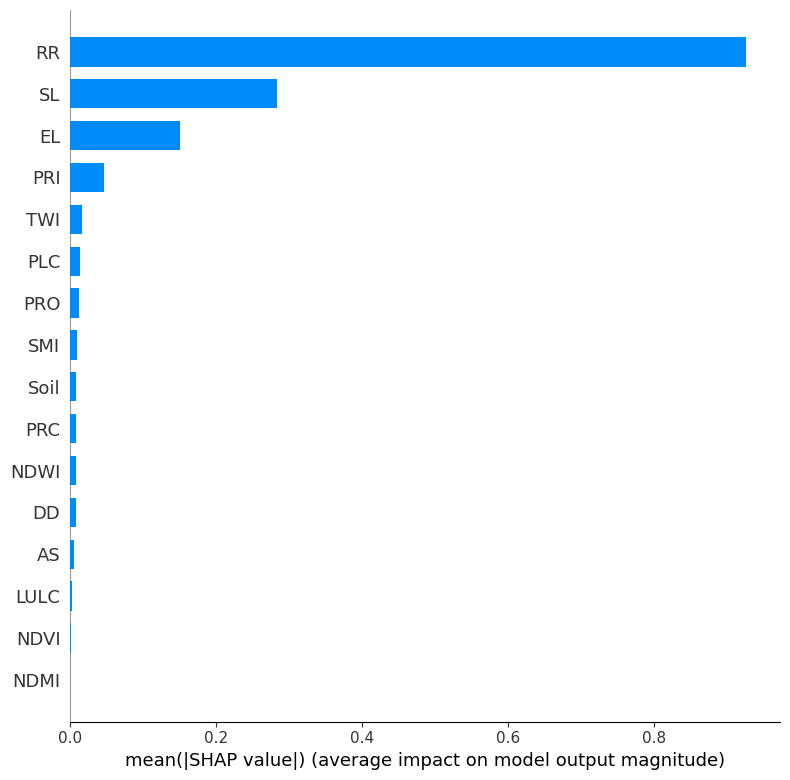

In [11]:
shap.summary_plot(shap_valuesgb, X.values, plot_type="bar",cmap = "viridis", class_names= X.columns, feature_names = X.columns,show=False)
results_path = 'gb_dd.png'
    #print(results_path)
plt.savefig(results_path,bbox_inches='tight', dpi=300,format="png")

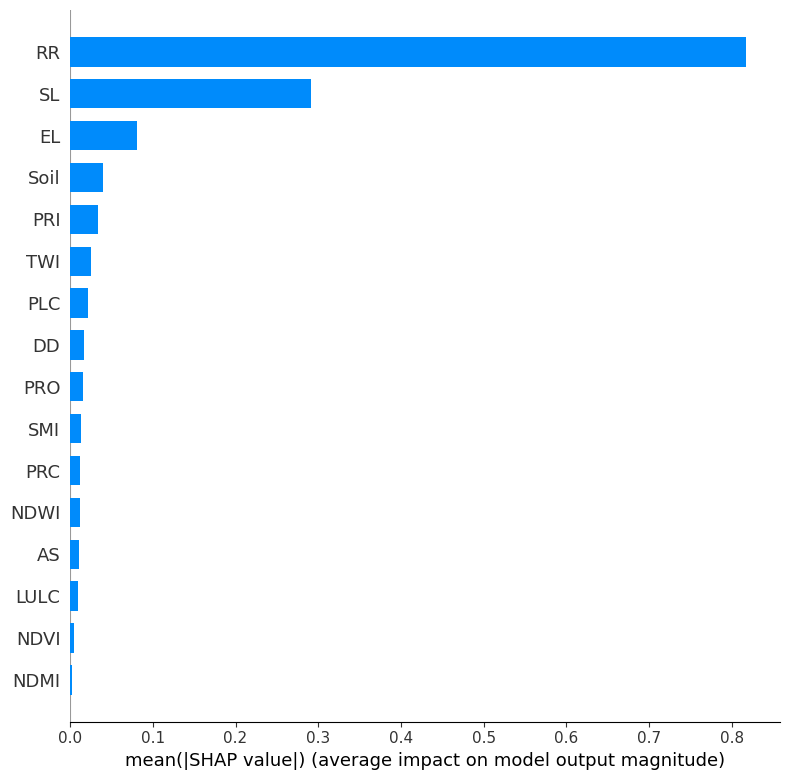

In [12]:
shap.summary_plot(shap_valuesrf, X.values, plot_type="bar",cmap = "viridis", class_names= X.columns, feature_names = X.columns,show=False)
results_path = 'RF_dd.png'
    #print(results_path)
plt.savefig(results_path,bbox_inches='tight', dpi=300,format="png")

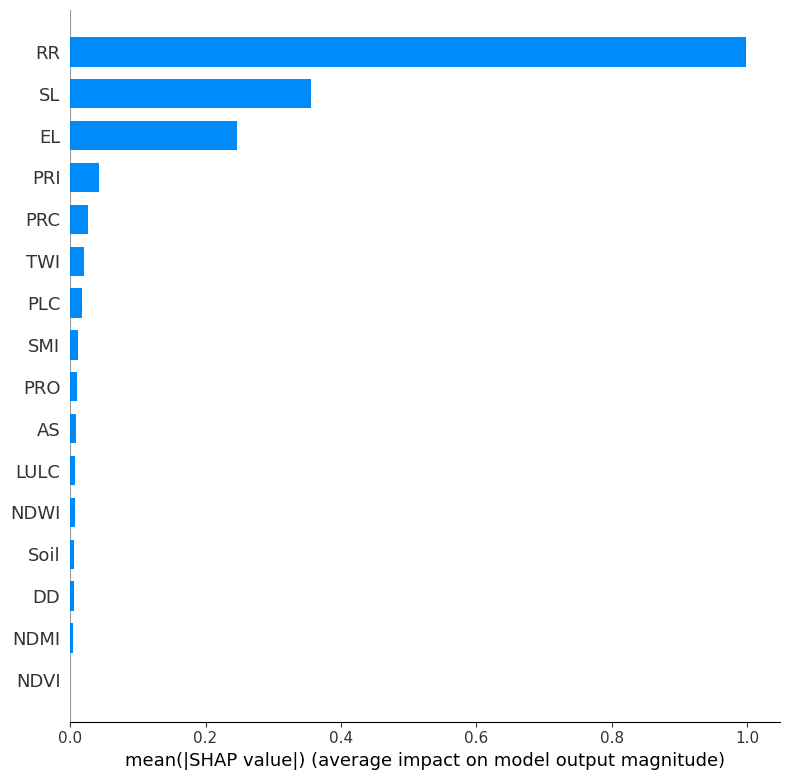

In [22]:
shap.summary_plot(shap_valuesdt, X.values, plot_type="bar",cmap = "viridis", class_names= X.columns, feature_names = X.columns,show=False)
results_path = 'DT_dd.png'
    #print(results_path)
plt.savefig(results_path,bbox_inches='tight', dpi=300,format="png")

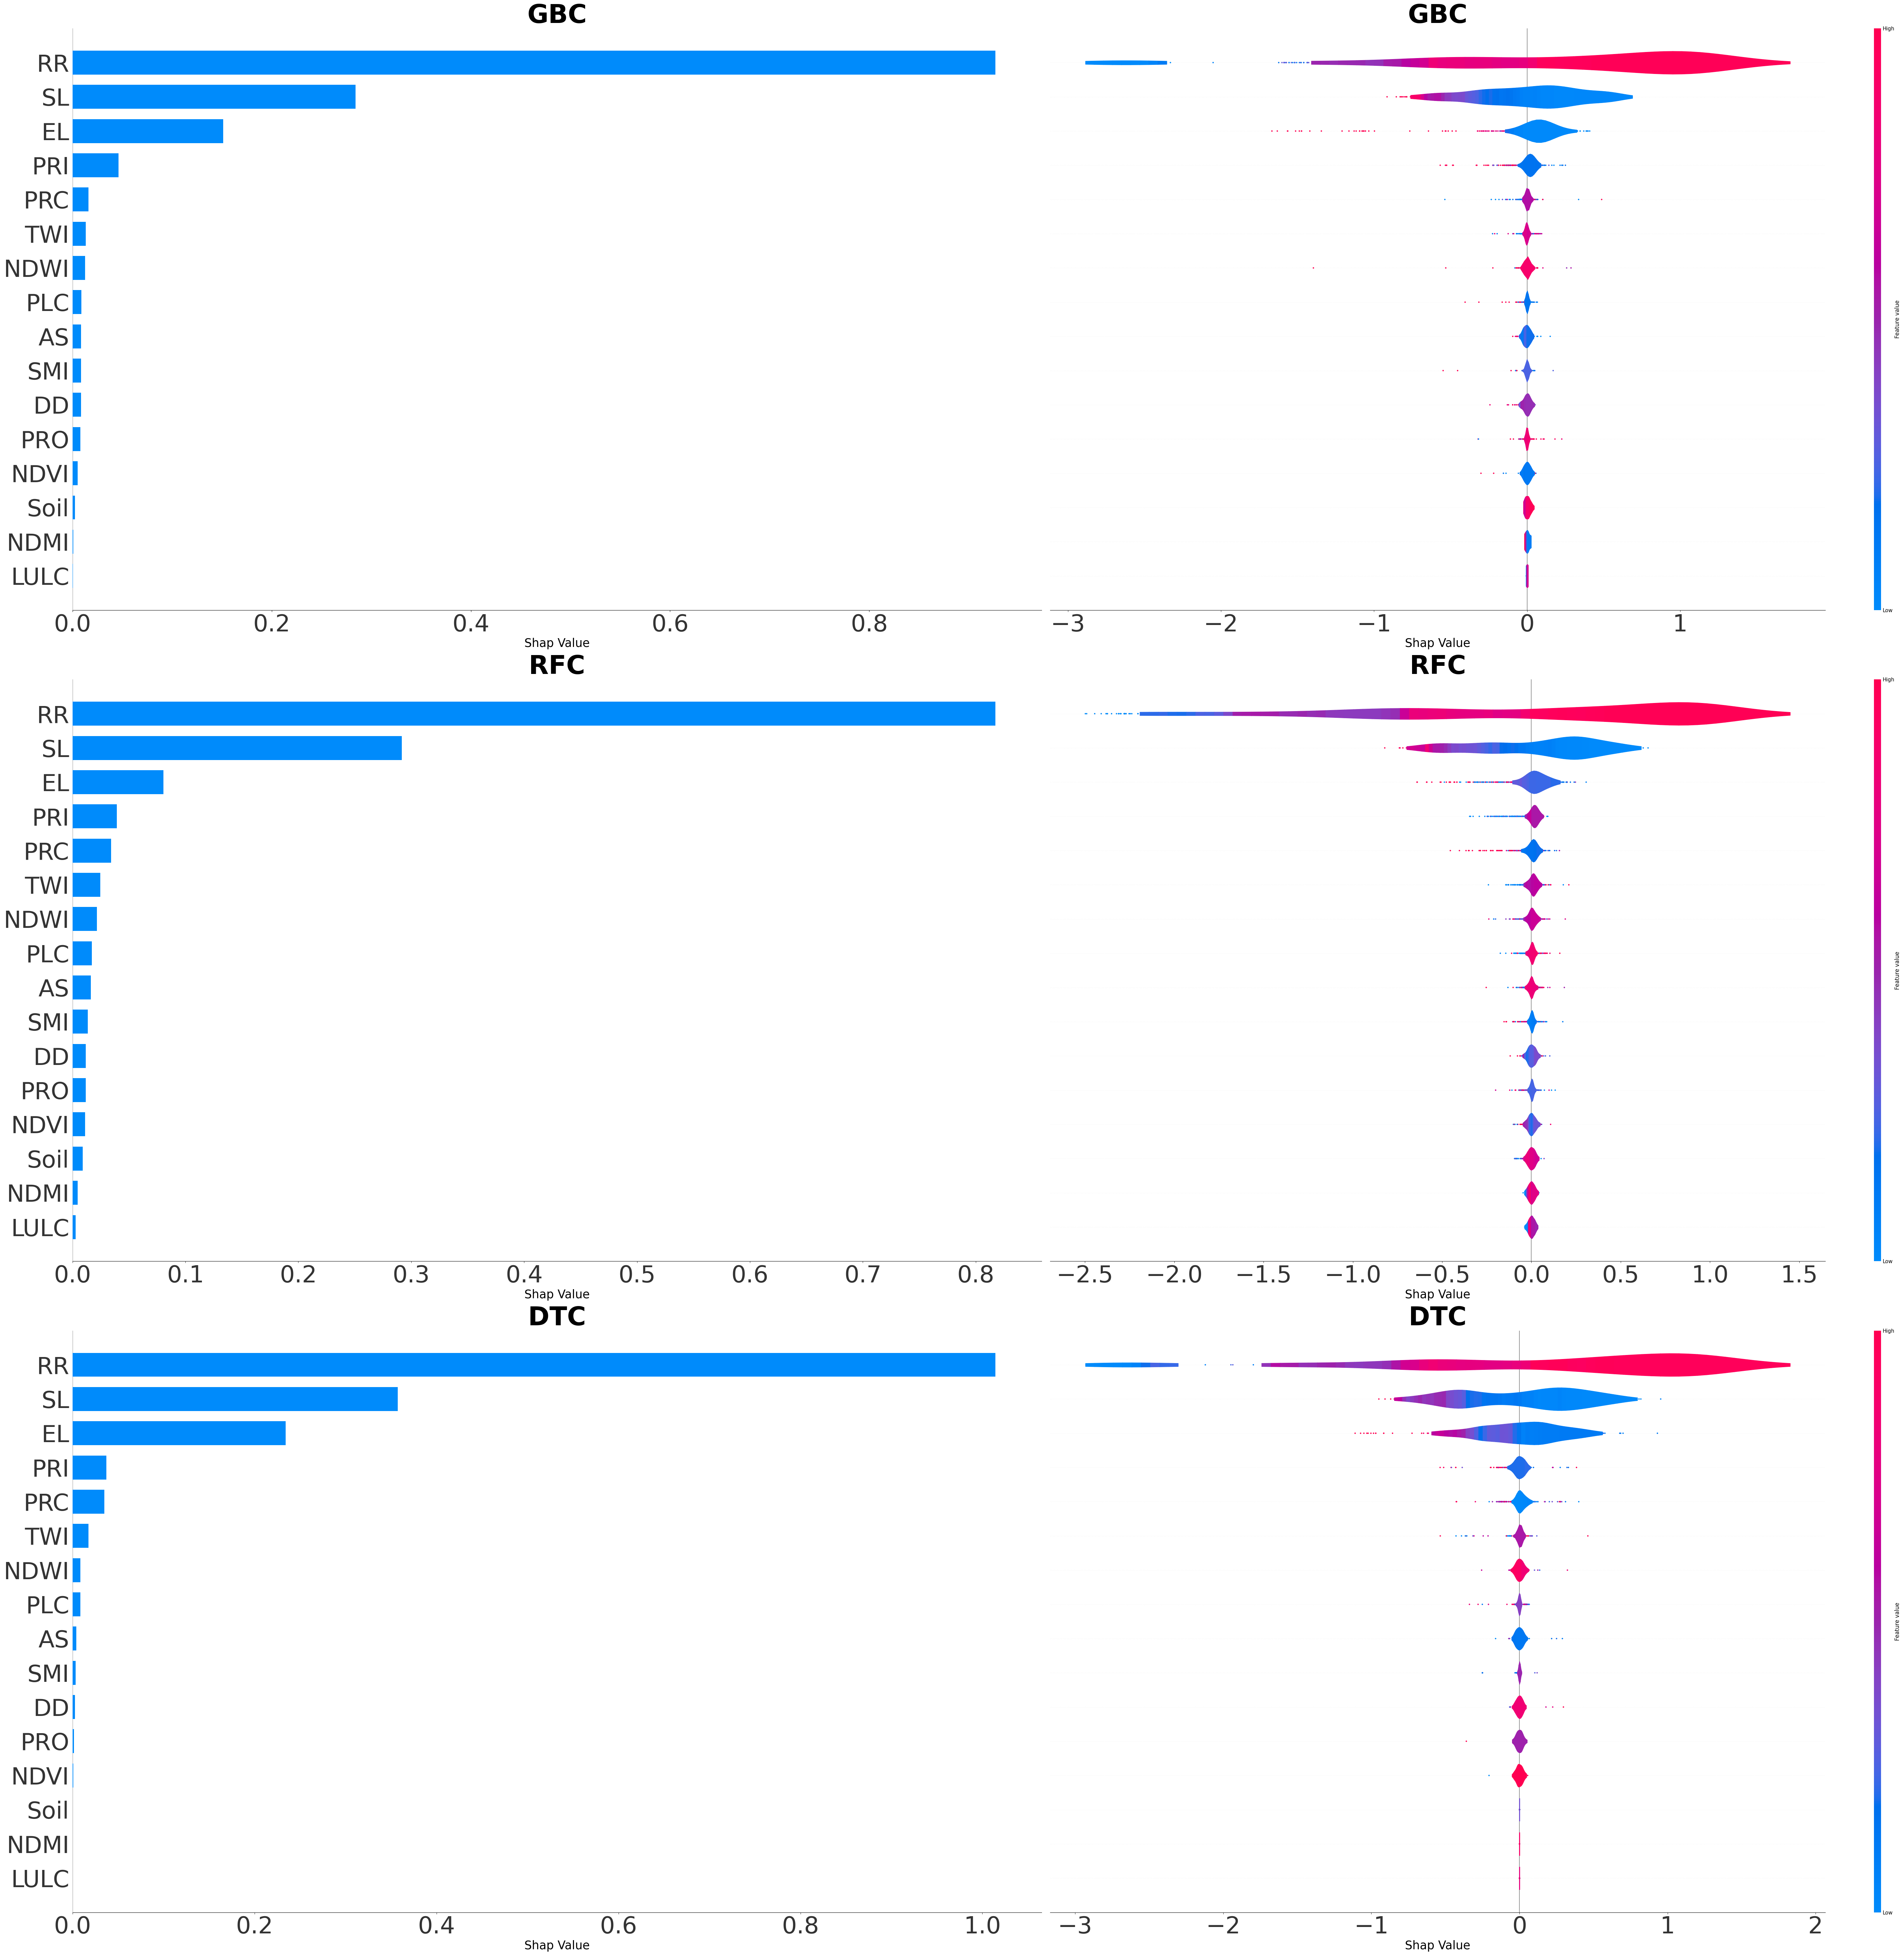

In [13]:
# Plots for summary of both models
fig, axes = plt.subplots(nrows=3, ncols=2,sharey=True)
ax1 = plt.subplot(321)
shap.summary_plot(shap_valuesgb, X.values, plot_type="bar", class_names= X.columns, feature_names = X.columns,show=False)
ax1.set_title("GBC",fontsize=55,fontweight="bold")
ax1.set_xlabel("Shap Value",fontsize=25)
ax1.tick_params(labelsize=50,color="black")

ax2 = plt.subplot(322)
shap.summary_plot(shap_valuesgb, plot_type='violin',show=False)
ax2.set_title("GBC",fontsize=55,fontweight="bold")
ax2.set_xlabel("Shap Value",fontsize=25)
ax2.tick_params(labelsize=50)

ax3 = plt.subplot(323)
shap.summary_plot(shap_valuesrf, X.values, plot_type="bar",cmap = "viridis", class_names= X.columns, feature_names = X.columns,show=False)
ax3.set_title("RFC",fontsize=55,fontweight="bold")
ax3.set_xlabel("Shap Value",fontsize=25)
#ax2.yaxis.offsetText.set_fontsize(25)
ax3.tick_params(labelsize=50)

ax4 = plt.subplot(324)
shap.summary_plot(shap_valuesrf, plot_type='violin',show=False)
ax4.set_title("RFC",fontsize=55,fontweight="bold")
ax4.set_xlabel("Shap Value",fontsize=25)
#ax2.yaxis.offsetText.set_fontsize(25)
ax4.tick_params(labelsize=50)

ax5 = plt.subplot(325)
shap.summary_plot(shap_valuesdt, X.values, plot_type="bar",cmap = "viridis", class_names= X.columns, feature_names = X.columns,show=False)
ax5.set_title("DTC",fontsize=55,fontweight="bold")
ax5.set_xlabel("Shap Value",fontsize=25)
#ax2.yaxis.offsetText.set_fontsize(25)
ax5.tick_params(labelsize=50)

ax6 = plt.subplot(326)
shap.summary_plot(shap_valuesdt, plot_type='violin',show=False)
ax6.set_title("DTC",fontsize=55,fontweight="bold")
ax6.set_xlabel("Shap Value",fontsize=25)
#ax2.yaxis.offsetText.set_fontsize(25)
ax6.tick_params(labelsize=50)
#plt.xticks(x, weight = 'bold')
#fig.suptitle('Global $ dependency Melekasa Station ',fontname="Times New Roman",style='italic',fontweight ="bold" ,fontsize=27,y=0.95)
plt.subplots_adjust(left=0.125,
                    bottom=0.1, 
                    right=0.9, 
                    top=0.9, 
                    wspace=0.1, 
                    hspace=0.25)
plt.gcf().set_size_inches(60,58)
plt.savefig("subnn.png",dpi=400 ,bbox_inches='tight')
#plt.xticks(X, weight = 'bold')

#plt.savefig("subnn.png",dpi=400 ,bbox_inches='tight')

#plt.gcf().set_size_inches(60,58)

#fig.suptitle(' GBR features ', fontsize=30)
plt.tight_layout()
plt.show()

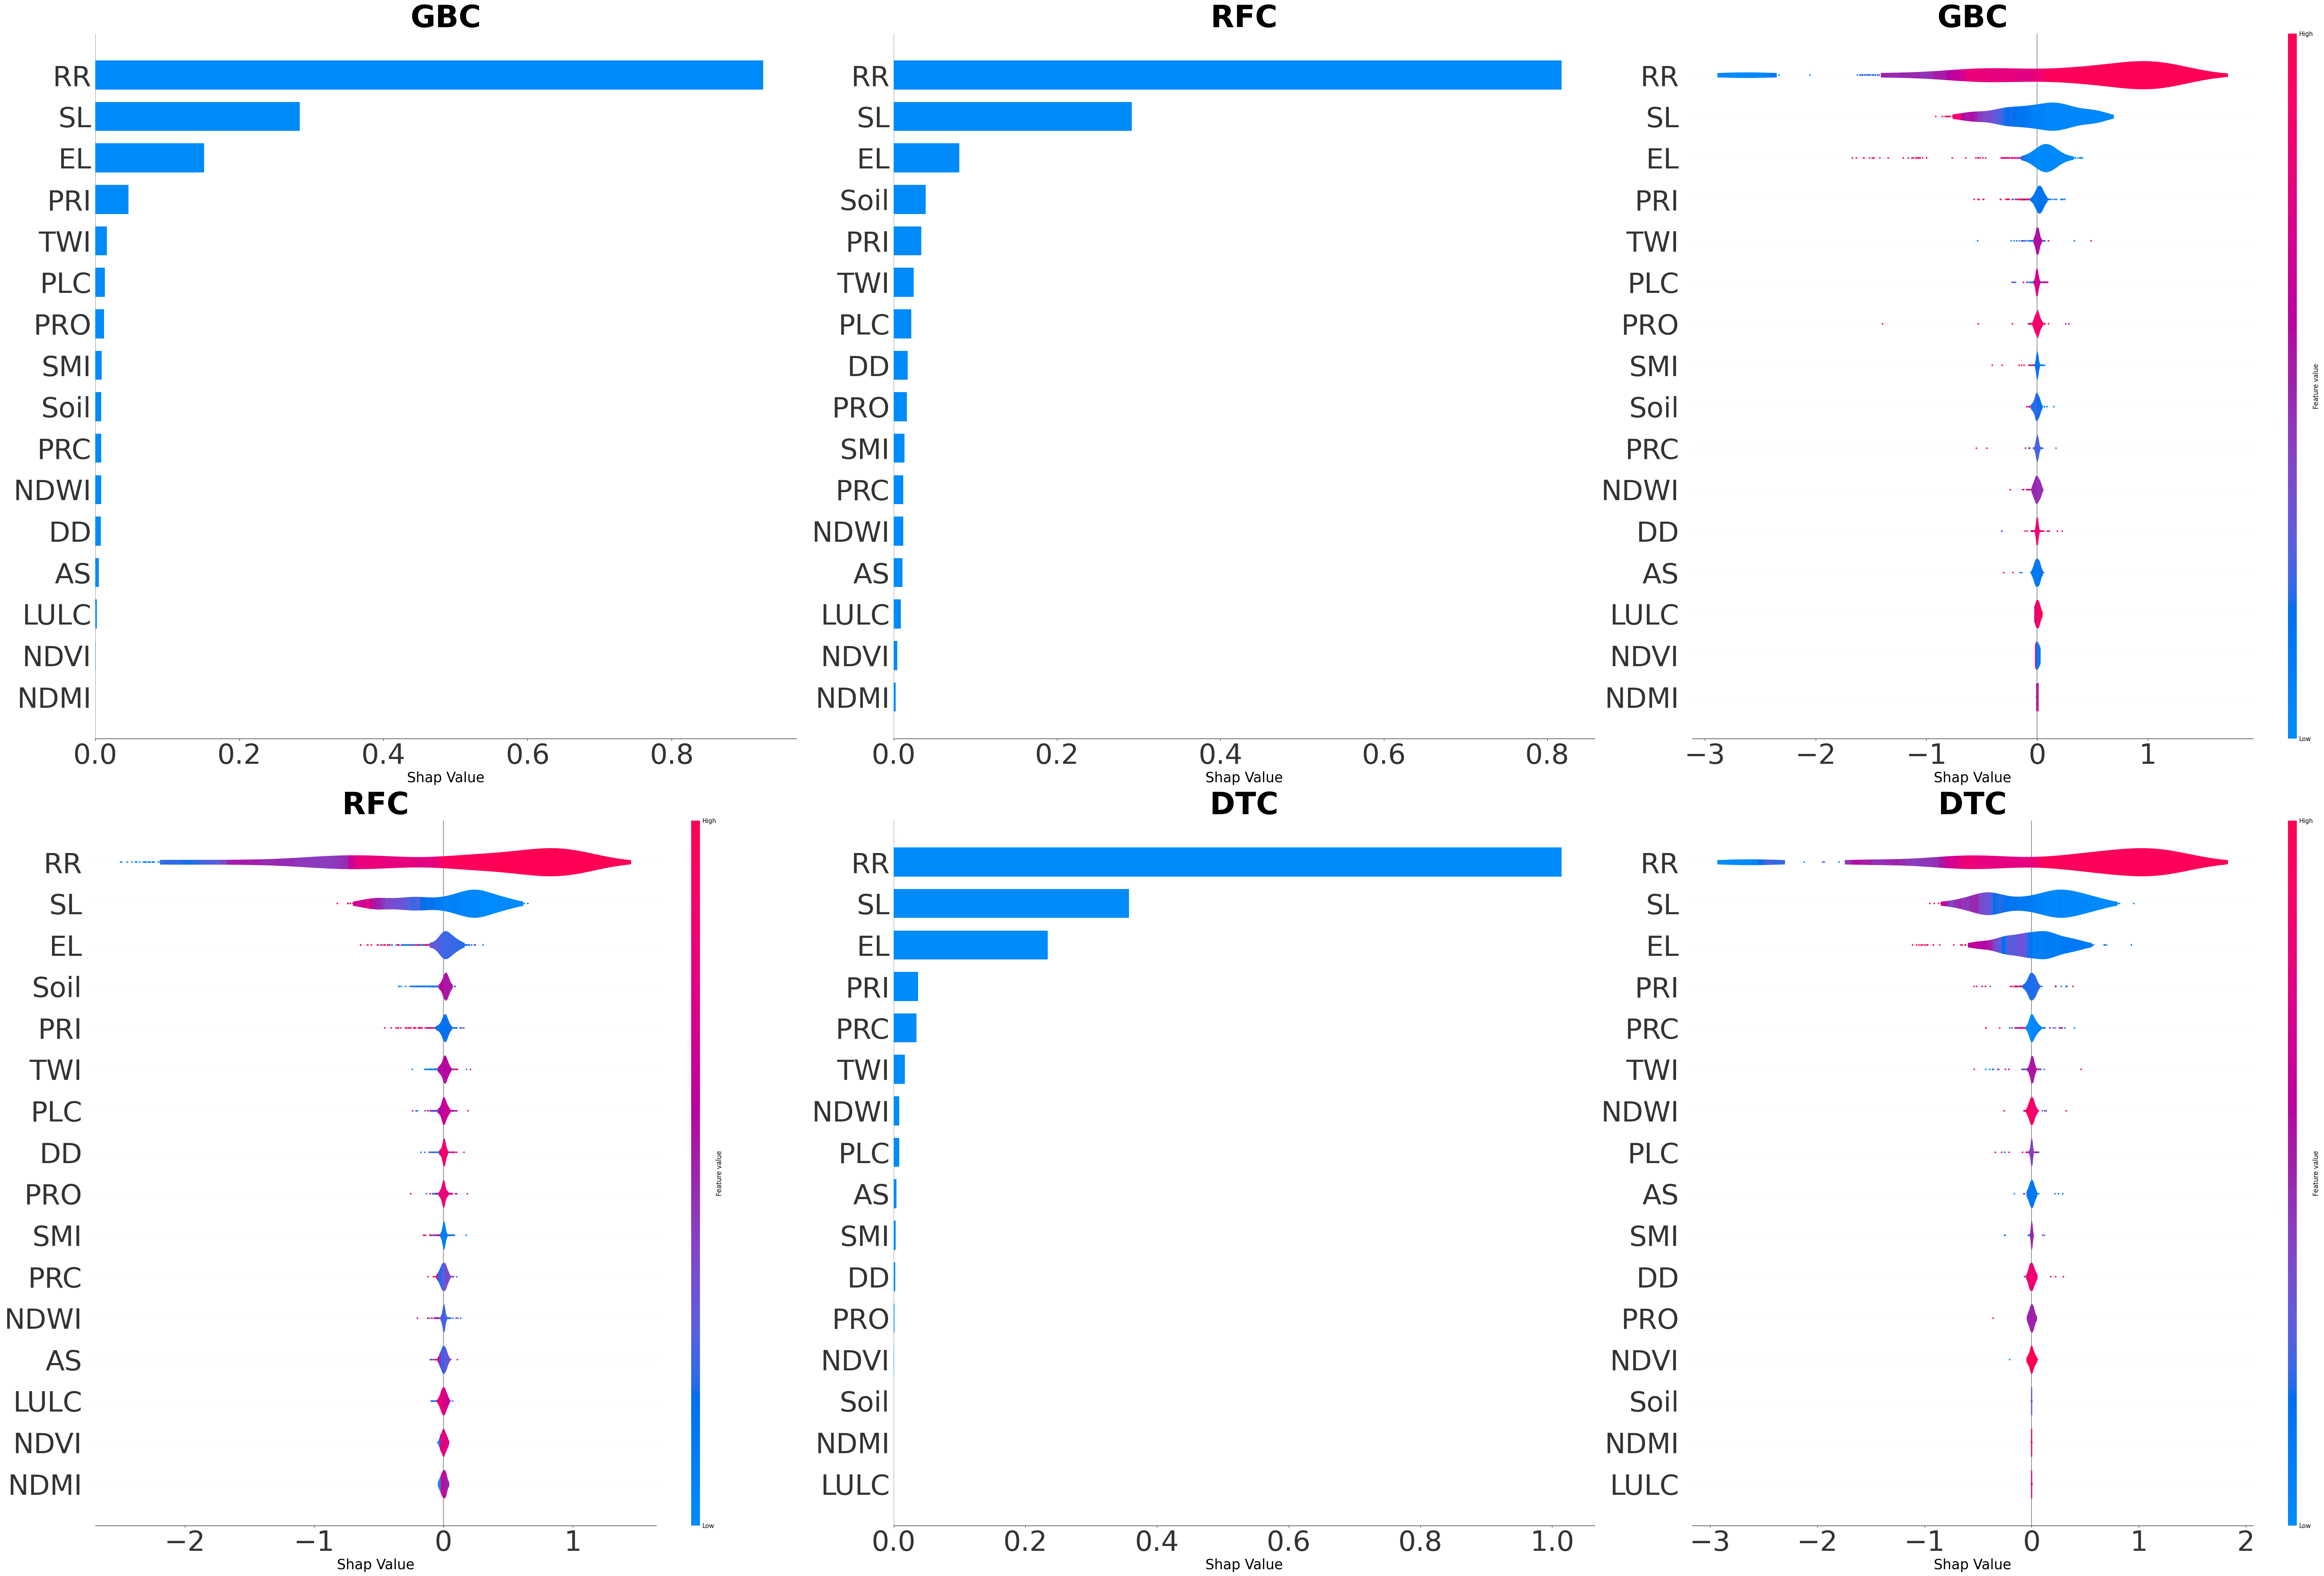

In [16]:
# Plots for summary of both models
fig, axes = plt.subplots(nrows=2, ncols=3,sharey=True)
ax1 = plt.subplot(331)
shap.summary_plot(shap_valuesgb, X.values, plot_type="bar",cmap = "viridis", class_names= X.columns, feature_names = X.columns,show=False)
ax1.set_title("GBC",fontsize=55,fontweight="bold")
ax1.set_xlabel("Shap Value",fontsize=25)
ax1.tick_params(labelsize=50,color="black")

ax2 = plt.subplot(332)
shap.summary_plot(shap_valuesrf, X.values, plot_type="bar",cmap = "viridis", class_names= X.columns, feature_names = X.columns,show=False)
ax2.set_title("RFC",fontsize=55,fontweight="bold")
ax2.set_xlabel("Shap Value",fontsize=25)
#ax2.yaxis.offsetText.set_fontsize(25)
ax2.tick_params(labelsize=50)


ax4 = plt.subplot(333)
shap.summary_plot(shap_valuesgb, plot_type='violin',show=False)
ax4.set_title("GBC",fontsize=55,fontweight="bold")
ax4.set_xlabel("Shap Value",fontsize=25)
ax4.tick_params(labelsize=50)


ax5 = plt.subplot(334)
shap.summary_plot(shap_valuesrf, plot_type='violin',show=False)
ax5.set_title("RFC",fontsize=55,fontweight="bold")
ax5.set_xlabel("Shap Value",fontsize=25)
#ax2.yaxis.offsetText.set_fontsize(25)
ax5.tick_params(labelsize=50)

ax3 = plt.subplot(335)
shap.summary_plot(shap_valuesdt, X.values, plot_type="bar",cmap = "viridis", class_names= X.columns, feature_names = X.columns,show=False)
ax3.set_title("DTC",fontsize=55,fontweight="bold")
ax3.set_xlabel("Shap Value",fontsize=25)
#ax2.yaxis.offsetText.set_fontsize(25)
ax3.tick_params(labelsize=50)

ax6 = plt.subplot(336)
shap.summary_plot(shap_valuesdt, plot_type='violin',show=False)
ax6.set_title("DTC",fontsize=55,fontweight="bold")
ax6.set_xlabel("Shap Value",fontsize=25)
#ax2.yaxis.offsetText.set_fontsize(25)
ax6.tick_params(labelsize=50)
#plt.xticks(x, weight = 'bold')
#fig.suptitle('Global $ dependency Melekasa Station ',fontname="Times New Roman",style='italic',fontweight ="bold" ,fontsize=27,y=0.95)
plt.subplots_adjust(left=0.125,
                    bottom=0.1, 
                    right=0.9, 
                    top=0.9, 
                    wspace=0.1, 
                    hspace=0.25)
plt.gcf().set_size_inches(60,58)
plt.savefig("subnnop2.png",dpi=400 ,bbox_inches='tight')
#plt.xticks(X, weight = 'bold')

#plt.savefig("subnn.png",dpi=400 ,bbox_inches='tight')

#plt.gcf().set_size_inches(60,58)

#fig.suptitle(' GBR features ', fontsize=30)
plt.tight_layout()
plt.show()

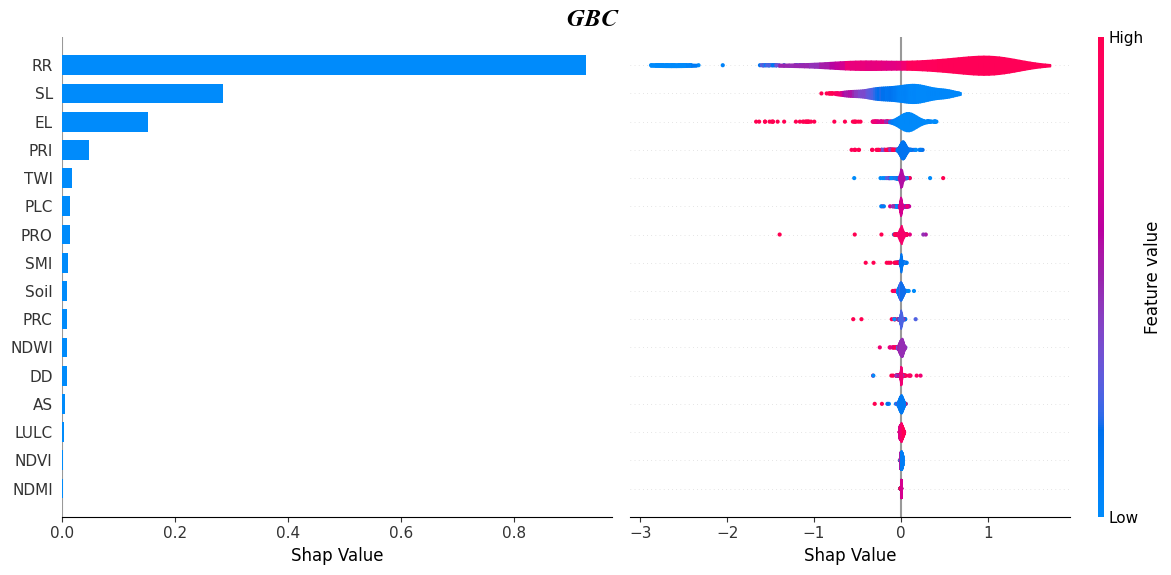

In [17]:
# Plots for summary of both models
fig, axes = plt.subplots(nrows=1, ncols=2,sharey=True)


ax1 = plt.subplot(121)
shap.summary_plot(shap_valuesgb, X.values, plot_type="bar",cmap = "viridis", class_names= X.columns, feature_names = X.columns,show=False)
#ax1.set_title("RFC",fontsize=20,fontweight="bold")
ax1.set_xlabel("Shap Value",fontsize=12)
#ax2.yaxis.offsetText.set_fontsize(25)
ax1.tick_params(labelsize=11)

ax2 = plt.subplot(122)
shap.summary_plot(shap_valuesgb, plot_type='violin',show=False)
#ax2.set_title("RFC",fontsize=20,fontweight="bold")
ax2.set_xlabel("Shap Value",fontsize=12)
#ax2.yaxis.offsetText.set_fontsize(25)
ax2.tick_params(labelsize=11)


#plt.xticks(x, weight = 'bold')
fig.suptitle('GBC ',fontname="Times New Roman",style='italic',fontweight ="bold" ,fontsize=18,y=0.95)
plt.subplots_adjust(left=0.125,
                    bottom=0.1, 
                    right=0.9, 
                    top=0.9, 
                    wspace=0.1, 
                    hspace=0.25)
plt.gcf().set_size_inches(12,6)
plt.savefig("subnnGBC.png",dpi=400 ,bbox_inches='tight')
#plt.xticks(X, weight = 'bold')

#plt.savefig("subnn.png",dpi=400 ,bbox_inches='tight')

#plt.gcf().set_size_inches(60,58)

#fig.suptitle(' GBR features ', fontsize=30)
plt.tight_layout()
plt.show()